<a href="https://colab.research.google.com/github/Michael-OvO/Burn-Detection-Classification/blob/main/colab_skin_burn(demo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Skin Burn Demo notebook trained on Yolov5S
Github Repo: https://github.com/Michael-OvO/Skin-Burn-Detection

Credit: This is a small demo for training our dataset on Yolov5s, which can achieve a decent result.

Author: Michael

created: 2022.8.16

# If you enjoyed this small demo please take a look at my github repo (Not finished yet, but give it a star or watch it) as I will be putting the rest of the materials up soon.
link to the repo: https://github.com/Michael-OvO/Skin-Burn-Detection
Thank you all for supporting!

## 1. Check hardware and set up the environment
Check GPU and install enviornments

In [ ]:
!nvidia-smi

Thu Aug 18 14:18:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

git clone the yolov5 repo

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13306, done.
remote: Counting objects: 100% (304/304), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 13306 (delta 176), reused 253 (delta 141), pack-reused 13002
Receiving objects: 100% (13306/13306), 12.80 MiB | 32.43 MiB/s, done.
Resolving deltas: 100% (9086/9086), done.
/content/yolov5


install needed dependencies

In [ ]:
!pip install -r requirements.txt  # install dependencies (ignore errors)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 32.5 MB/s 
     |████████████████████████████████| 1.6 MB 58.4 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


prepare dataset

In [ ]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 29.8 MB/s 
     |████████████████████████████████| 178 kB 66.6 MB/s 
     |████████████████████████████████| 1.1 MB 68.2 MB/s 
     |████████████████████████████████| 67 kB 8.1 MB/s 
     |████████████████████████████████| 54 kB 4.1 MB/s 
     |████████████████████████████████| 138 kB 76.0 MB/s 
     |████████████████████████████████| 62 kB 2.0 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.14-py3-none-any.whl size=24837 sha256=227f2e861e48b3203e3320b102749fd1bc542337e34ef5821b07d474cf7e4ba1
  Stored in directory: /root/.cache/pip/wheels/c7/84/36/a6a32c749ead923690d15d20443fb53fa2fe10beaa408f371b
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=4091bec9ab64dddd5ffc846b3320de07d95da3c00032d10864fc640d71f95c20
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="ayUn19nAlV2gQNRP8NI8")
project = rf.workspace("yingcai").project("skin_burn_detection")
dataset = project.version(9).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to skin_burn_detection-9 in yolov5pytorch:: 100%|██████████| 5492/5492 [00:00<00:00, 6688.24it/s]


## Check if the dataset is installed properly

In [ ]:
!ls

classify	 export.py   README.md		    train.py
CONTRIBUTING.md  hubconf.py  requirements.txt	    tutorial.ipynb
data		 LICENSE     setup.cfg		    utils
detect.py	 models      skin_burn_detection-9  val.py


## Optional: Login to Wandb to track training results
please set up your user secret as indicated in the comments below

In [ ]:
!pip install --upgrade -q wandb

     |████████████████████████████████| 1.8 MB 15.3 MB/s 
     |████████████████████████████████| 181 kB 60.6 MB/s 
     |████████████████████████████████| 157 kB 54.1 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 139 kB 59.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 0.2.14 requires urllib3==1.26.6, but you have urllib3 1.26.11 which is incompatible.


Paste your API key to Wandb 

In [ ]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## Train Command
feel free to play around with epochs, batchsize, and all other kinds of perameters. 
the number of epochs here is narrowed down to 100 because of the limited runtim on colab(around 2hours max for free version. If you are using pro feel free to increase the epoch)

In [ ]:
!python train.py --img 416 --epoch 100 --batch-size 128 --data skin_burn_detection-9/data.yaml --cfg ./models/yolov5s.yaml --name exp  --cache

wandb: Currently logged in as: michael_ovo. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=skin_burn_detection-9/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-13-gc0e7a77 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0

## Run Inference
After a sucess run(roughly around 5~6 hours if the model is trained for 500 epochs, the model will be saved inside runs/train/exp/weights/best.pt), looad that model and run an inference on the validation/test dataset with detect.py

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.3 --source skin_burn_detection-9/test/images/

detect: weights=['runs/train/exp/weights/best.pt'], source=skin_burn_detection-9/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.2-13-gc0e7a77 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/126 /content/yolov5/skin_burn_detection-9/test/images/062517294437_327_png.rf.d7eec70b8a0131cf3436175f6cf3b668.jpg: 416x416 Done. (0.008s)
image 2/126 /content/yolov5/skin_burn_detection-9/test/images/062517294437_832_png.rf.52daa363bd7e058c2f9a6829d3343050.jpg: 416x416 1 3rd degree, Done. (0.008s)
image 3/126 /content/yolov5/skin_burn

## Note:
The performance on this notebook is limited as it is trained with only 100 epochs and using the public dataset downloaded from Kaggle (directly transferred to Roboflow by me) By closly examining the results one can easily find out that there are several mislabeling or failures in detection. This perfomance have no correlations with the actual performance of the model, but just to let people have a quick feeling about what this project is and what can this project do. 

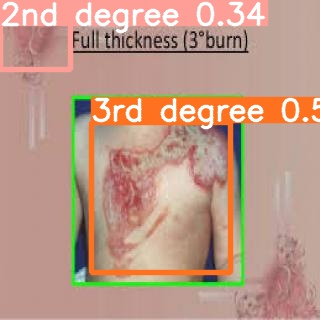

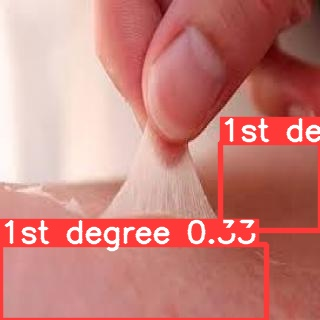

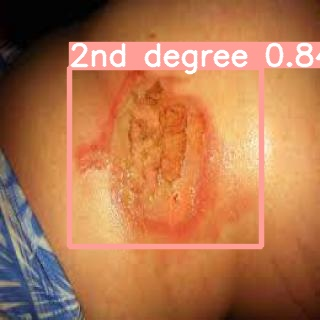

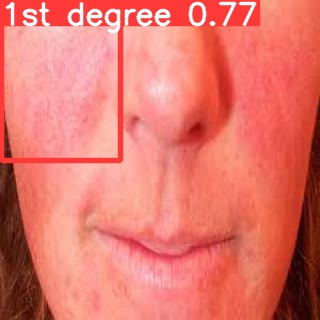

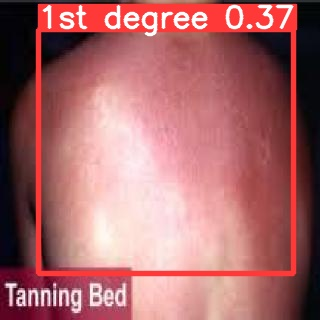

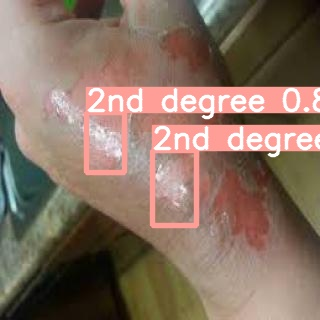

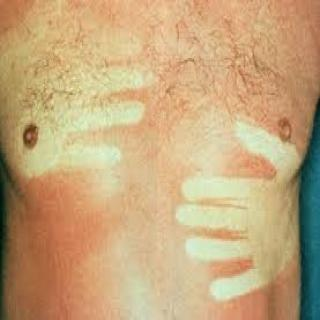

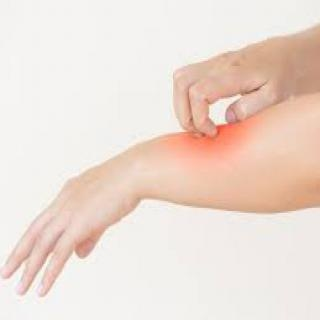

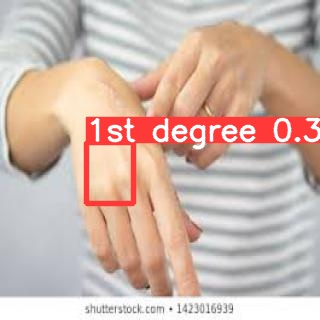

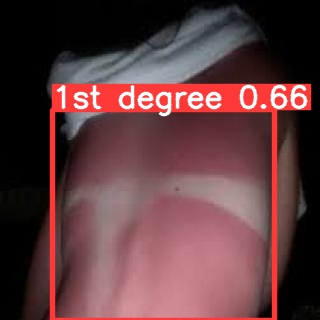

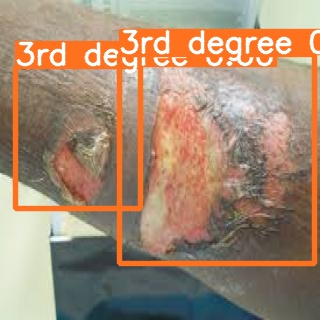

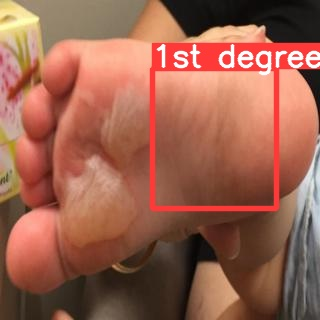

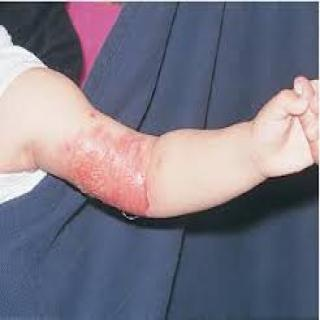

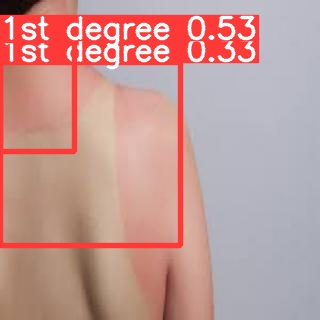

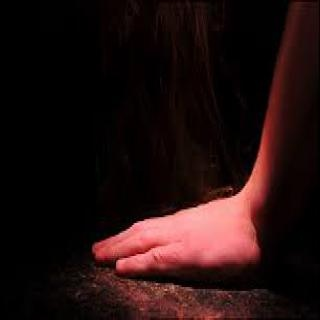

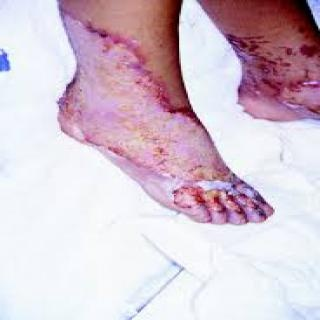

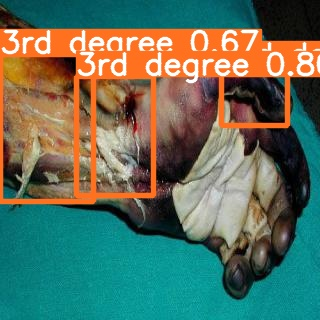

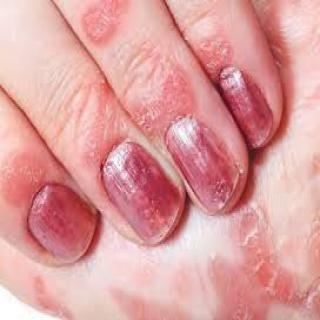

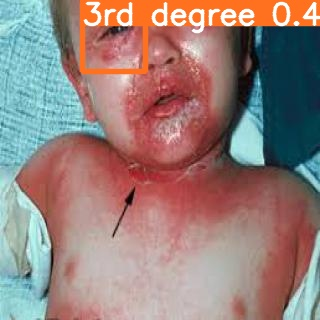

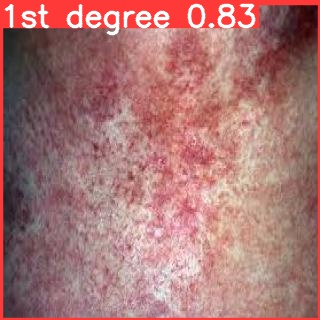

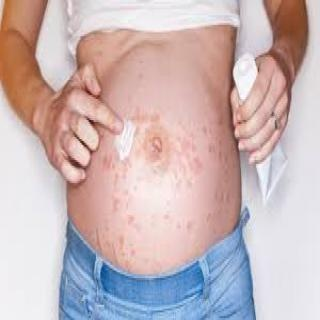

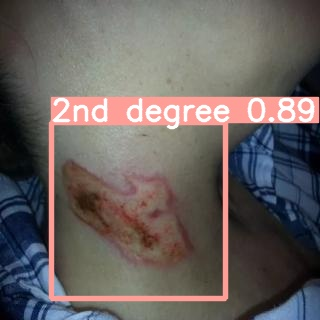

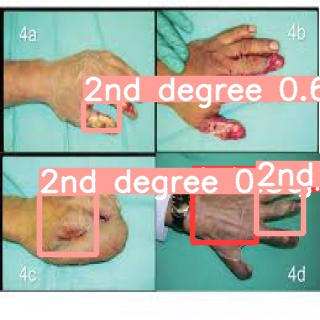

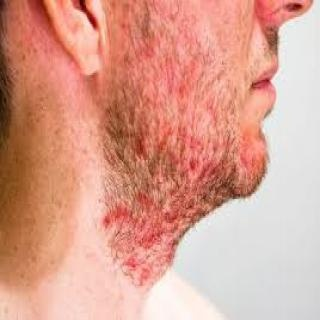

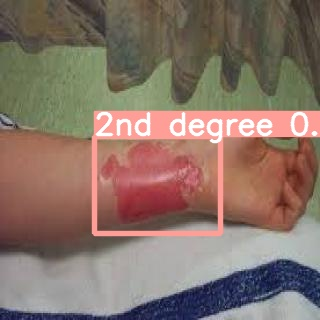

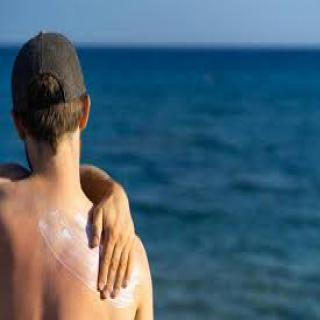

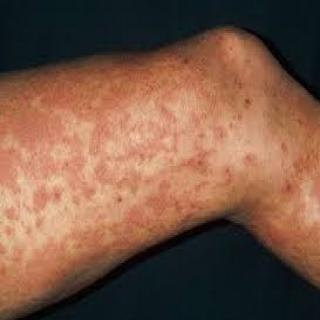

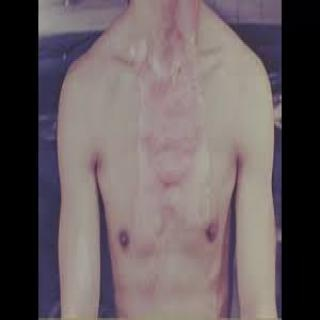

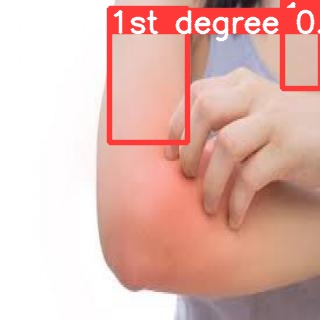

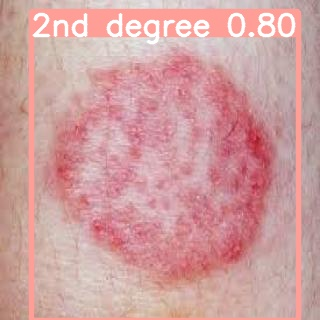

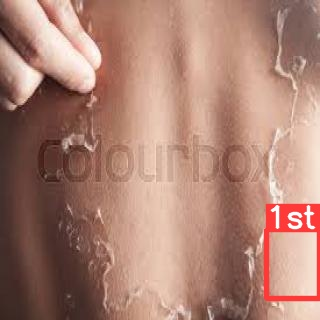

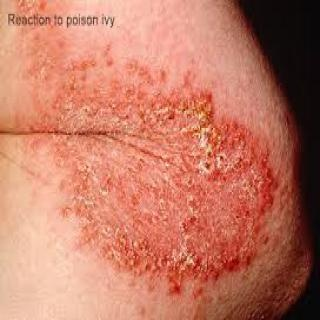

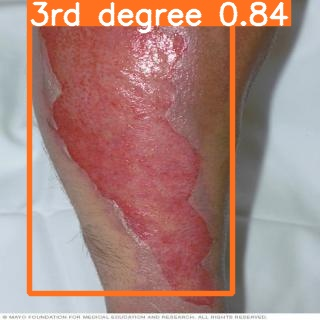

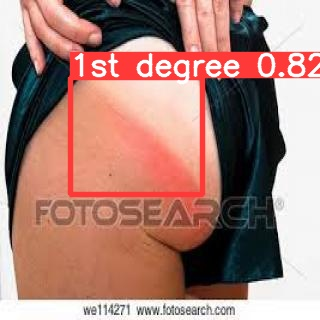

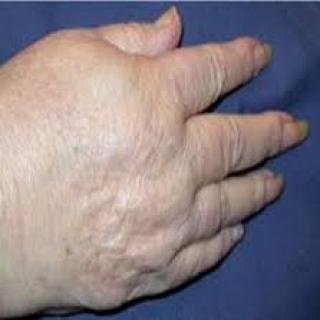

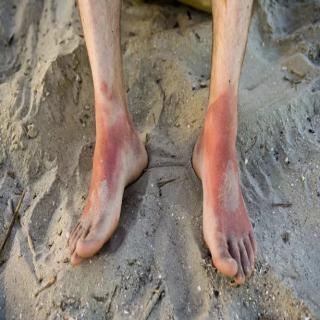

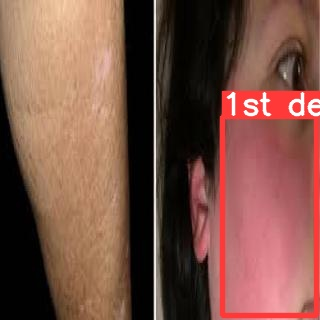

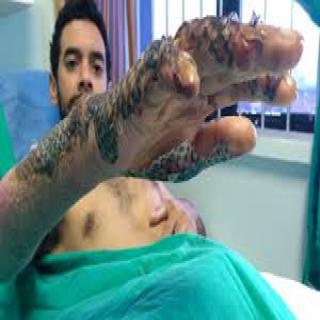

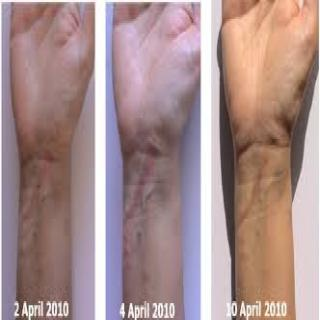

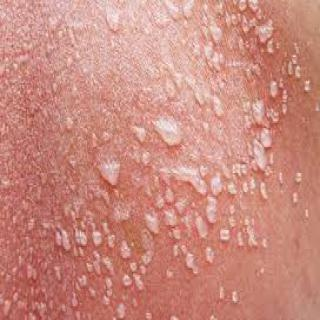

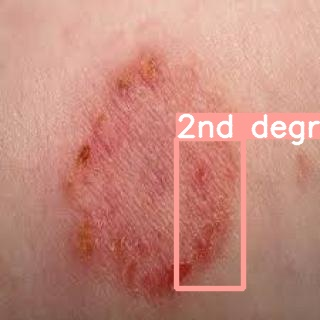

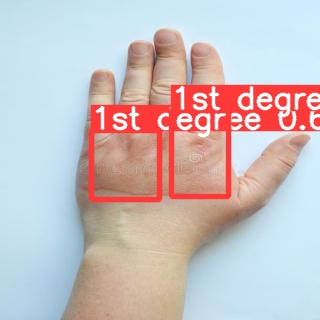

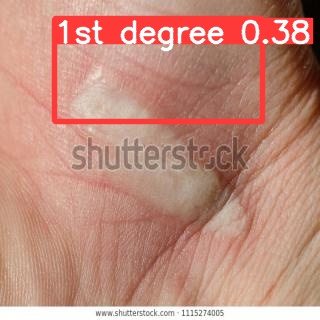

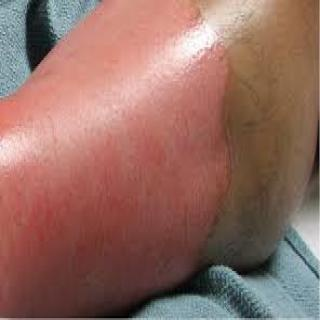

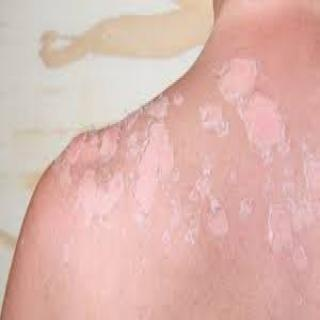

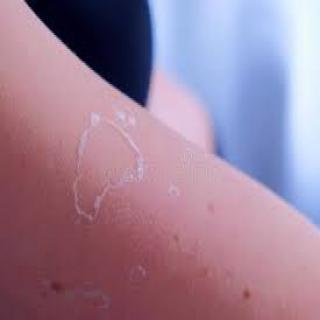

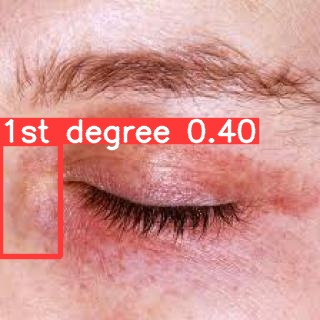

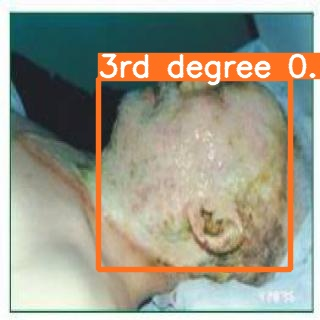

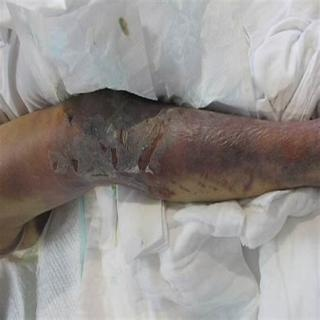

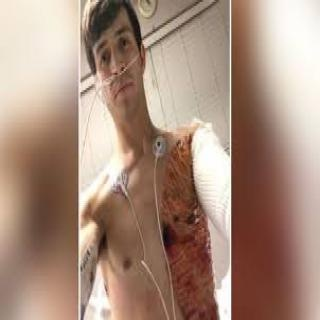

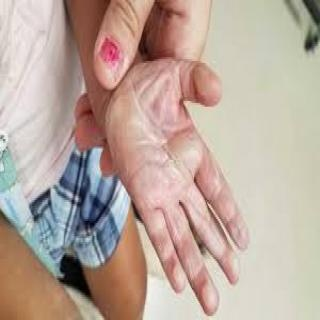

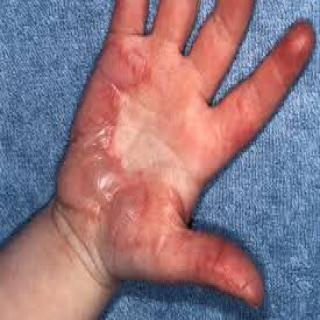

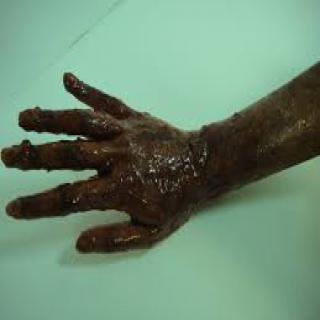

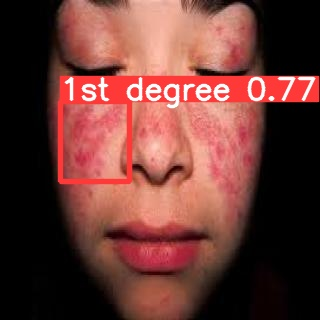

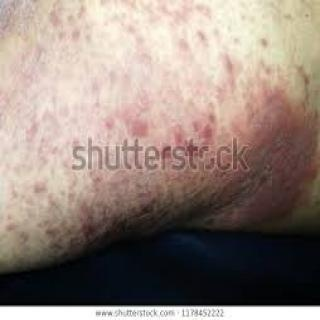

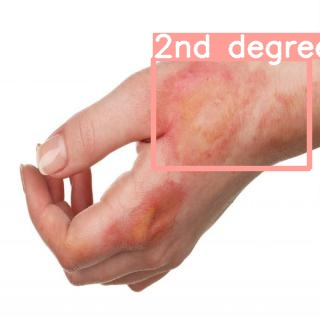

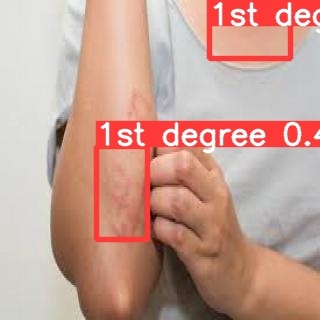

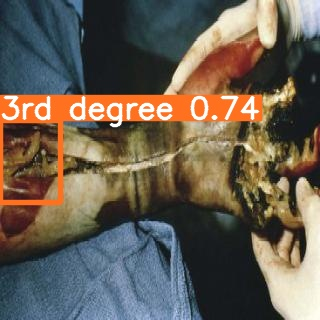

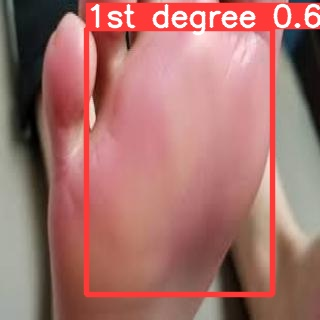

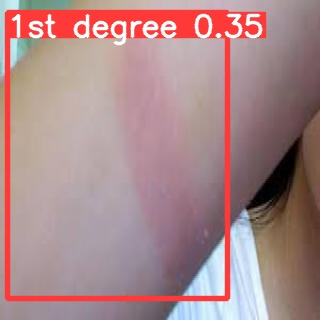

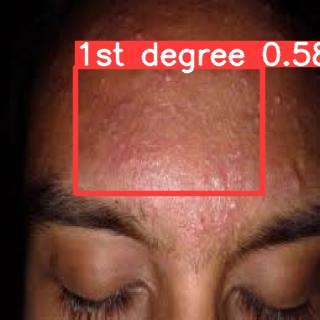

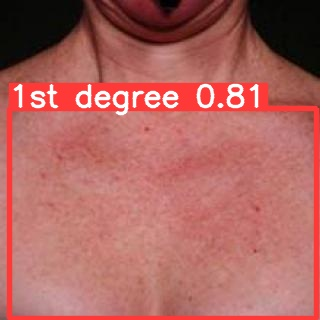

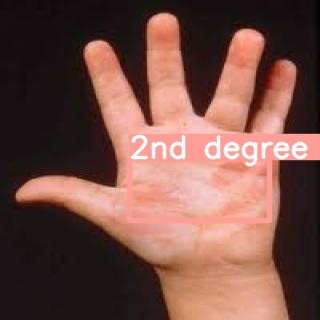

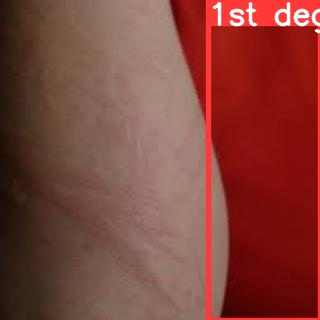

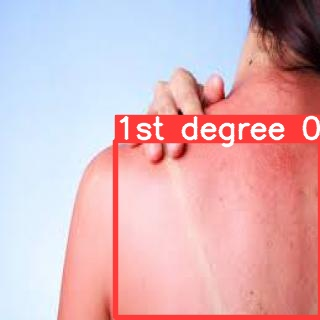

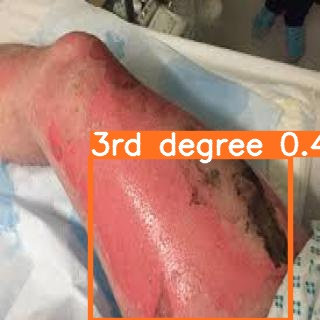

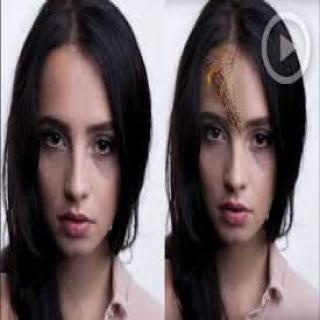

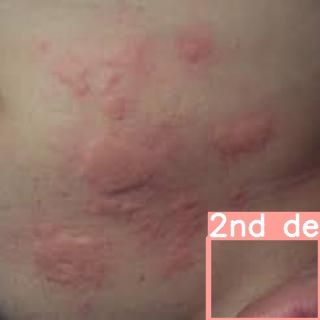

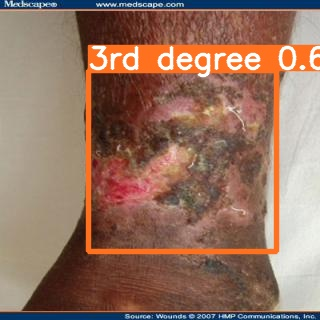

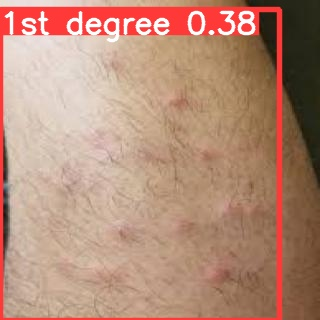

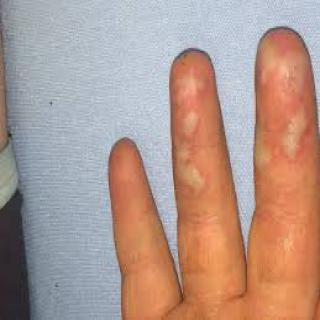

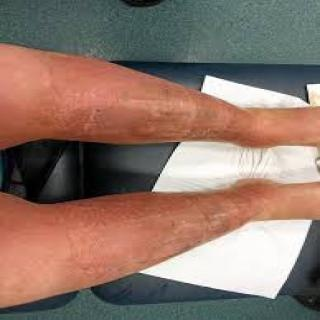

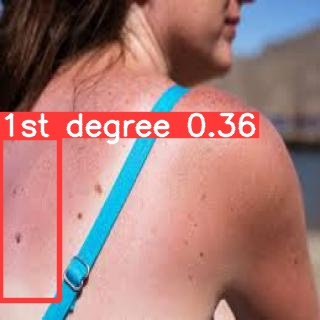

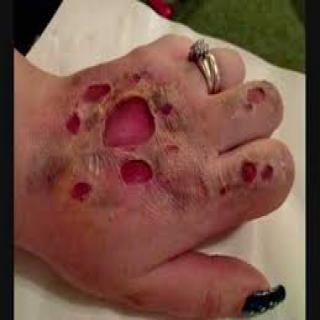

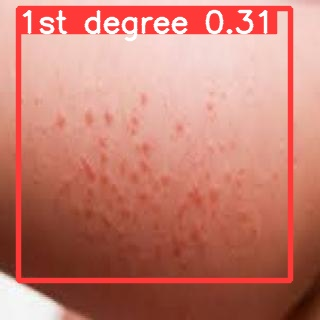

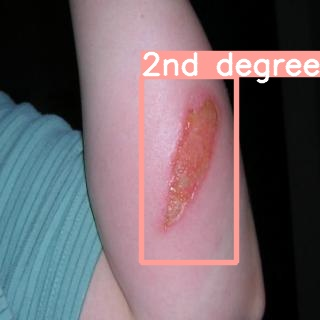

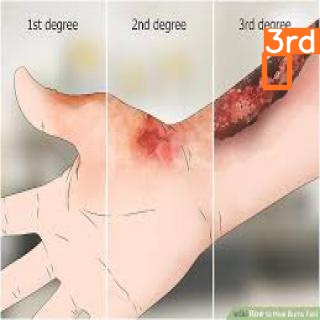

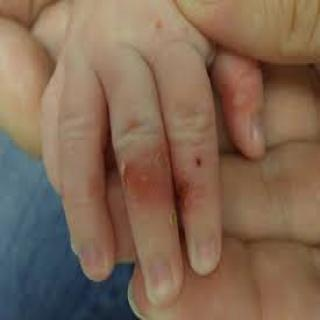

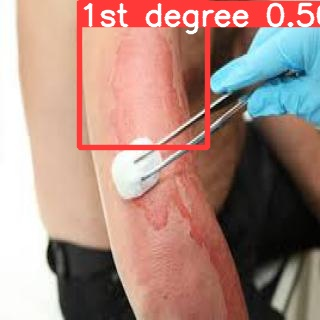

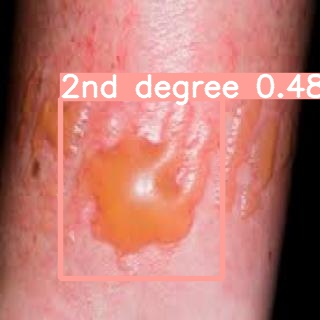

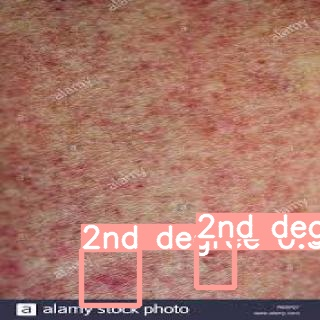

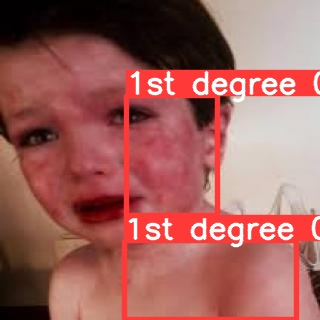

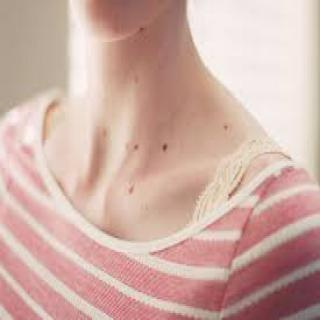

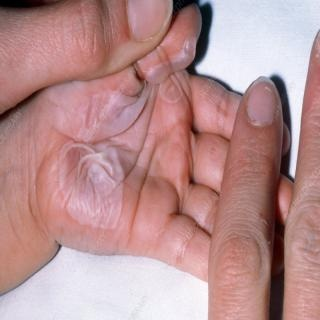

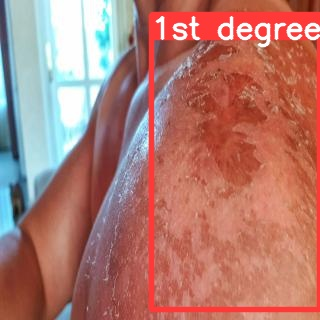

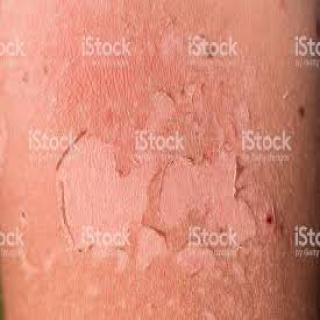

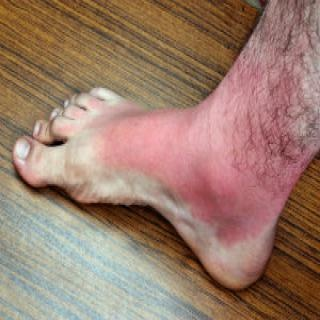

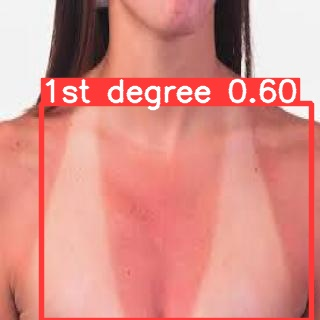

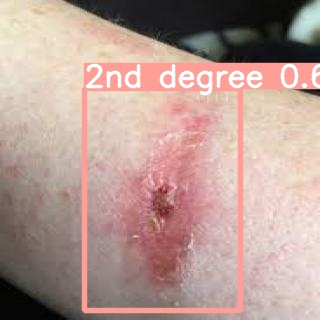

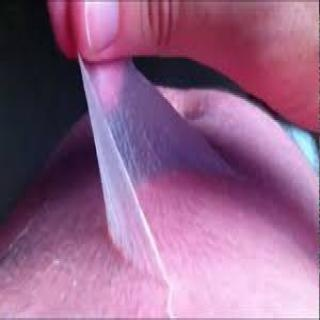

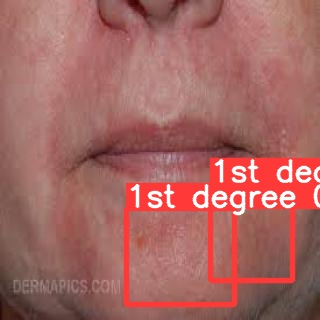

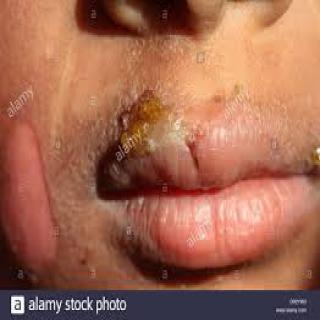

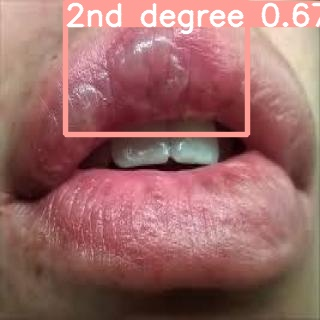

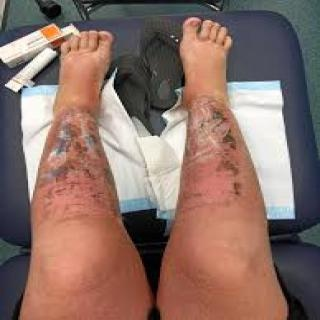

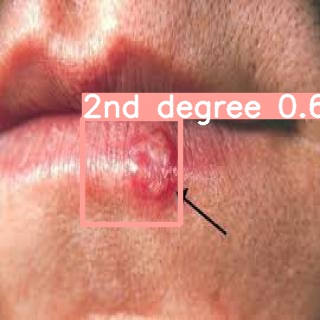

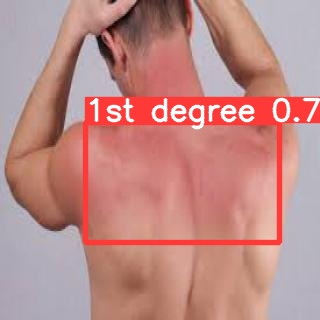

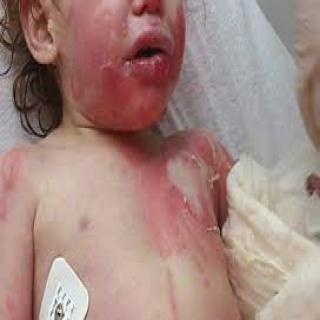

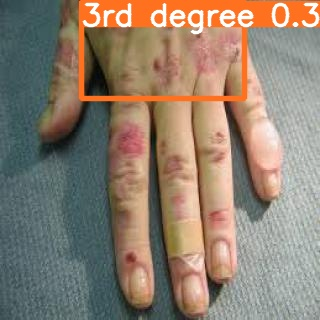

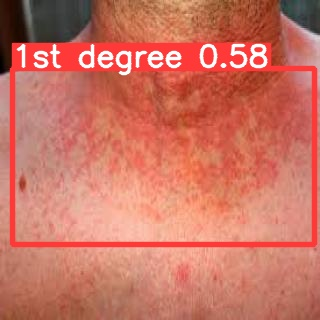

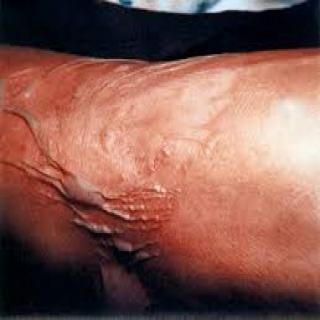

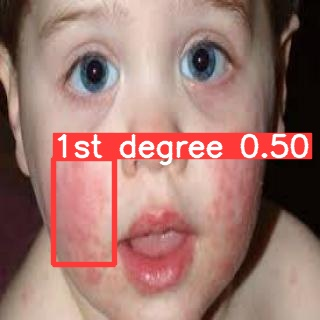

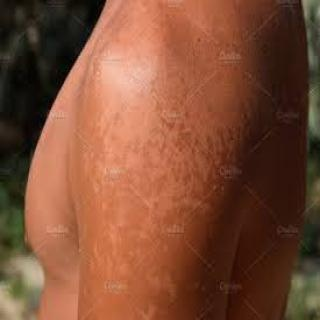

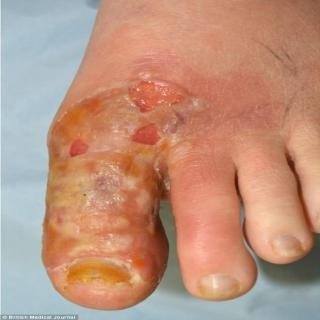

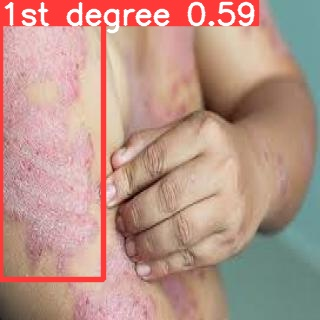

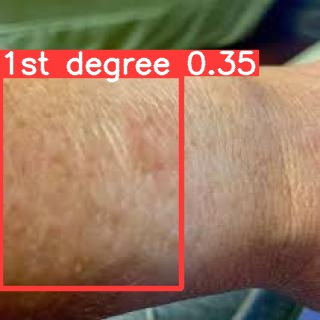

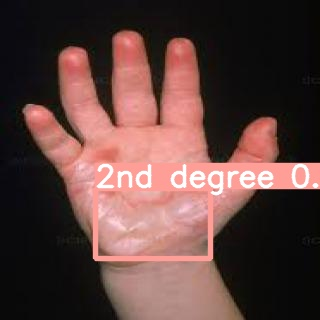

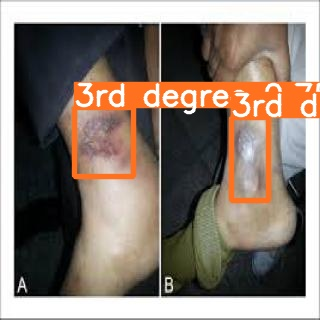

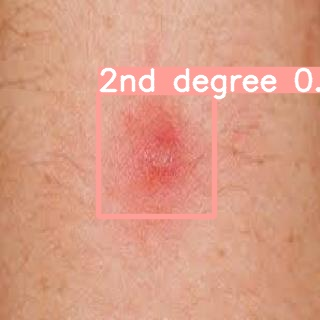

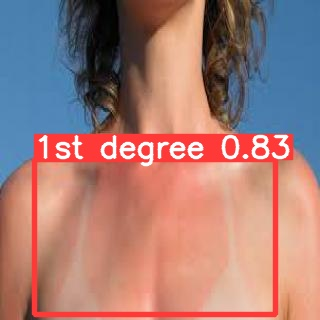

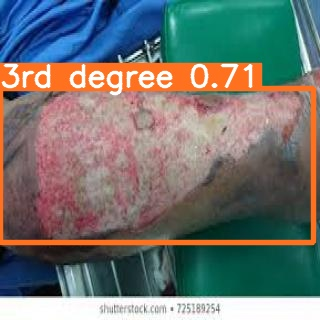

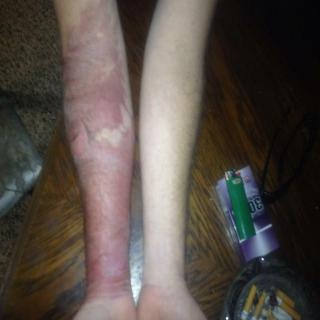

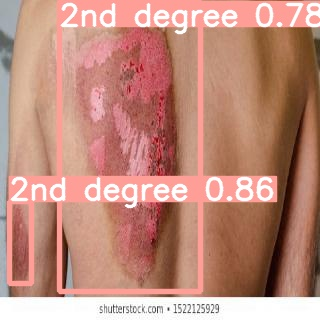

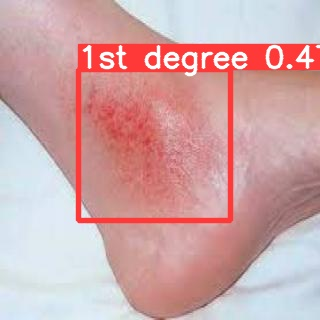

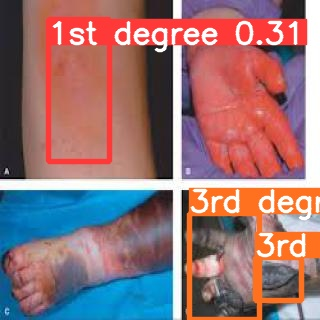

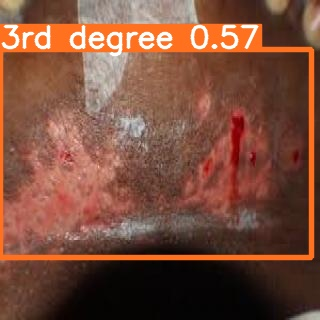

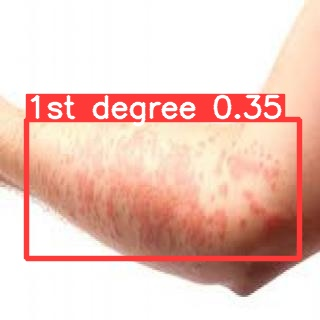

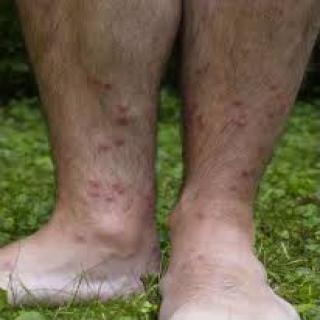

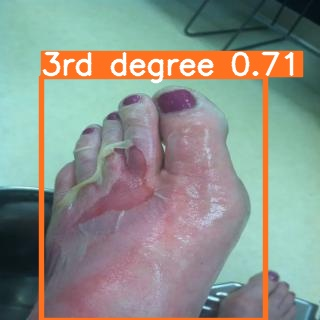

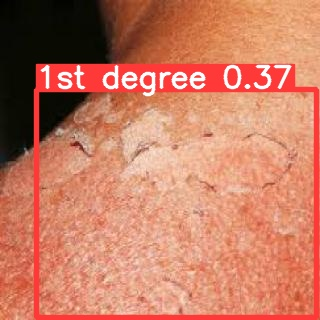

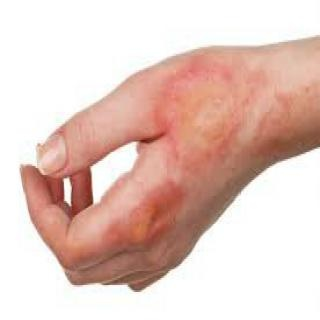

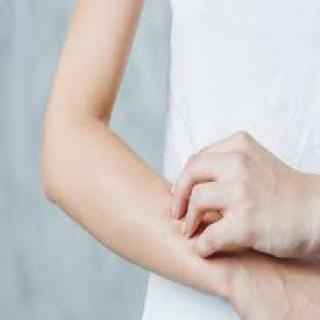

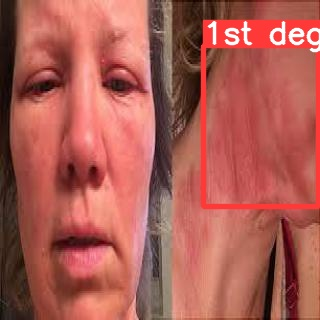

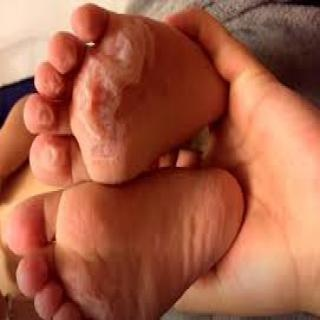

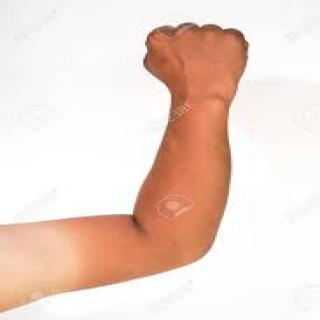

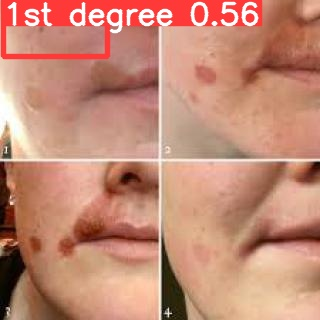

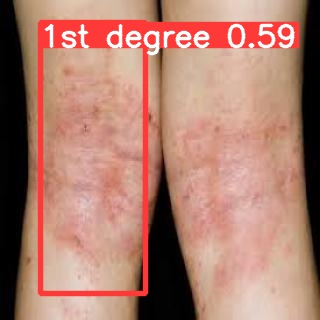

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

## When the training is complete, download the model file as well as the results